<a href="https://colab.research.google.com/github/naralakamsani/unsupervised_learning/blob/main/reservation_retention_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import kurtosis

from scipy.spatial.distance import cdist

from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

from sklearn.metrics import  mean_squared_error

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.manifold import LocallyLinearEmbedding, Isomap

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

import time

#Data

[Hotel Reservation](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)


##Load Data

In [ ]:
!curl -o Hotel_Reservations.csv https://raw.githubusercontent.com/naralakamsani/supervised_learning/main/data/reservation_retention/Hotel%20Reservations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3164k  100 3164k    0     0  6796k      0 --:--:-- --:--:-- --:--:-- 6791k


In [ ]:
df = pd.read_csv("Hotel_Reservations.csv")

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Encode Labeled Data

In [ ]:
df = df.drop(columns=["Booking_ID"])

df['booking_status'].replace('Not_Canceled', 0, inplace=True)
df['booking_status'].replace('Canceled', 1, inplace=True)

df['type_of_meal_plan'].replace('Not Selected', 0, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 1', 1, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 2', 2, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 3', 3, inplace=True)

df['room_type_reserved'].replace('Room_Type 1', 1, inplace=True)
df['room_type_reserved'].replace('Room_Type 2', 2, inplace=True)
df['room_type_reserved'].replace('Room_Type 3', 3, inplace=True)
df['room_type_reserved'].replace('Room_Type 4', 4, inplace=True)
df['room_type_reserved'].replace('Room_Type 5', 5, inplace=True)
df['room_type_reserved'].replace('Room_Type 6', 6, inplace=True)
df['room_type_reserved'].replace('Room_Type 7', 7, inplace=True)

df['market_segment_type'].replace('Offline', 0, inplace=True)
df['market_segment_type'].replace('Online', 1, inplace=True)
df['market_segment_type'].replace('Corporate', 2, inplace=True)
df['market_segment_type'].replace('Aviation', 3, inplace=True)
df['market_segment_type'].replace('Complementary', 4, inplace=True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), df['booking_status'], test_size=0.2, random_state=1)

In [ ]:
print("Train data size:", len(x_train))
print("Test data size:", len(x_test))

Train data size: 29020
Test data size: 7255


## Balance Dataset

In [ ]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    19483
1     9537
Name: booking_status, dtype: int64


In [ ]:
# rus = RandomUnderSampler(random_state=0)
# x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    19483
1     9537
Name: booking_status, dtype: int64


## Scale Data

In [ ]:
x_train_not_scaled = x_train
x_test_not_scaled = x_test

scaler =  MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

standard_scaler =  StandardScaler()
normalized_x_train = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
normalized_x_test = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns)

In [ ]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.25,0.0,0.333333,0.176471,0.333333,0.0,0.0,0.259594,1.0,0.090909,0.866667,0.00,0.0,0.000000,0.000000,0.140741,0.0
1,0.50,0.0,0.333333,0.058824,0.666667,0.0,0.0,0.295711,0.0,0.636364,0.466667,0.00,0.0,0.000000,0.000000,0.175000,0.0
2,0.50,0.0,0.166667,0.000000,0.333333,0.0,0.5,0.036117,1.0,0.727273,0.833333,0.25,0.0,0.000000,0.000000,0.303704,0.0
3,0.50,0.0,0.333333,0.117647,0.666667,0.0,0.0,0.381490,1.0,0.272727,0.700000,0.00,0.0,0.000000,0.000000,0.196296,0.0
4,0.25,0.0,0.166667,0.000000,0.333333,1.0,0.0,0.011287,1.0,1.000000,0.133333,1.00,1.0,0.153846,0.137931,0.000000,0.2


# Plots

## k-means

In [ ]:
def plot_km(title, x, k_range=range(2,10)):
  plt.figure()
  plt.title(title)

  plt.xlabel("Number of clusters")
  plt.ylabel("Score")

  scores = []

  for k in k_range:
        km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
        km_model.fit(x)
        score = silhouette_score(x, km_model.labels_)
        scores.append(score)

  plt.grid(True)

  plt.plot(k_range, scores, 'o-')

  return plt

In [ ]:
def plot_km(x, k=(2,10), metric='distortion', locate_elbow=True):
  km_model = KMeans(n_clusters=8, n_init='auto', random_state=0)
  km_visualizer = KElbowVisualizer(km_model, k=k,  metric=metric, locate_elbow=locate_elbow)
  km_visualizer.fit(x)

  return km_visualizer

## Expectation Maximization

In [ ]:
def plot_em(title, x, components_range=range(2,10), methods = ['full', 'tied', 'spherical']):
  plt.figure()
  plt.title(title)

  plt.xlabel("Number of clusters")
  plt.ylabel("AIC/BIC Score")

  method_scores = {method: {'AIC':[], 'BIC':[]} for method in methods}

  for method in methods:
    for n in components_range:
        em_model  = GaussianMixture(n_components=n, random_state=0, covariance_type=method)
        em_model.fit(x_train)

        method_scores[method]['AIC'].append(em_model.aic(x))
        method_scores[method]['BIC'].append(em_model.bic(x))


  plt.grid(True)

  for method, scores in method_scores.items():
    plt.plot(components_range, scores['AIC'], 'o-', label='AIC + ' + method)
    plt.plot(components_range, scores['BIC'], 'bx--', label='BIC + ' + method)

  plt.legend(loc="best")

  return plt

## Principal Component Analysis (PCA)

In [ ]:
def plot_pca(title, x):
  plt.figure()
  plt.title(title)

  components = x.shape[1]

  pca = PCA(n_components=components, random_state=0)
  pca.fit(x)

  eigenvalues = pca.explained_variance_
  explained_variance_ratio = pca.explained_variance_ratio_

  x_ticks = np.arange(len(eigenvalues)) + 1
  plt.bar(x_ticks, explained_variance_ratio, align='center', alpha=0.5)
  plt.step(x_ticks, np.cumsum(explained_variance_ratio), where='mid')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principal Component')

  plt.grid(True)

  return plt

## Independent Component Analysis (ICA)

In [ ]:
def plot_ica(title, x):
  plt.figure()
  plt.title(title)

  plt.xlabel("Number of Components")
  plt.ylabel("Average Absolute Kurtosis")

  components_range=range(1, x.shape[1] + 1)

  avg_kurtosis = []

  for n in components_range:
    ica = FastICA(n_components=n, whiten='unit-variance', random_state=0)
    x_ica = ica.fit_transform(x)
    avg_kurtosis.append(np.mean(np.abs(kurtosis(x_ica, axis=0))))

  plt.grid(True)

  plt.plot(components_range, avg_kurtosis, 'o-')

  return plt

## Random Projection (RP)

In [ ]:
def plot_rp(title, x):
  plt.figure()
  plt.title(title)

  plt.xlabel("Number of Components")
  plt.ylabel("Reconstruction Error")

  components_range=range(1, x.shape[1] + 1)

  reconstruction_errors = []

  for n in components_range:
    rp = GaussianRandomProjection(n_components=n, random_state=0)
    x_rp = rp.fit_transform(x)
    x_reconstructed = np.dot(x_rp, np.linalg.pinv(rp.components_.T))
    reconstruction_errors.append(mean_squared_error(x, x_reconstructed))

  plt.grid(True)

  plt.plot(components_range, reconstruction_errors, 'o-')

  return plt

# Clusering

##K-Means

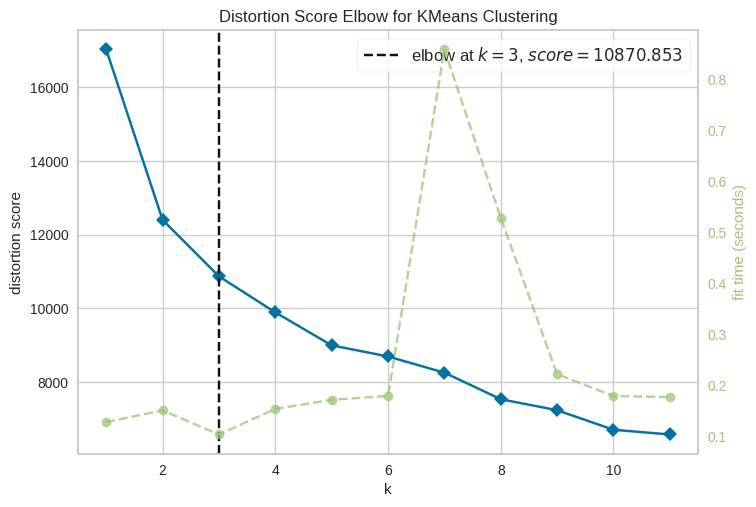

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km_visual_elbow = plot_km(x_train, k=(1,12))
km_visual_elbow.show()

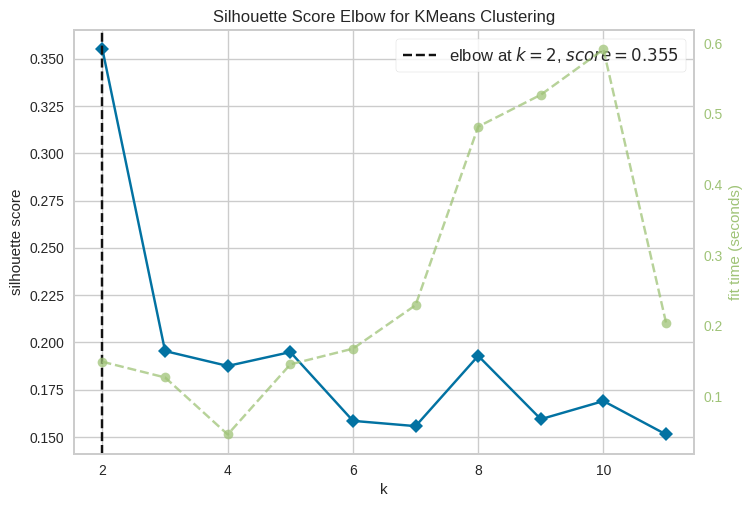

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
km_visual_silhouette = plot_km(x_train, k=(2,12), metric='silhouette')
km_visual_silhouette.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


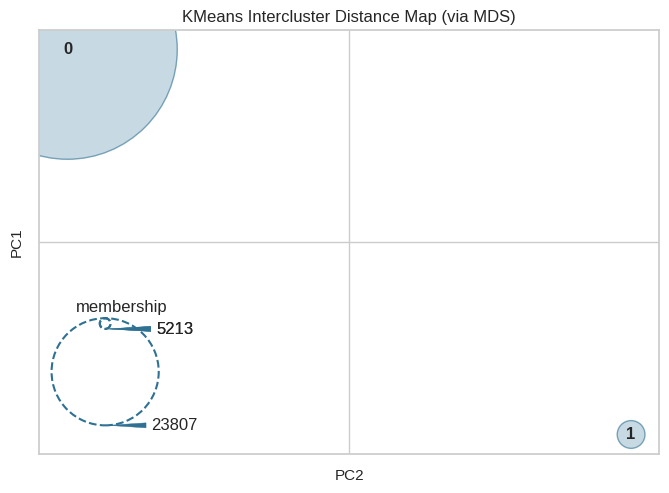

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
km_model = KMeans(n_clusters=2, n_init='auto', random_state=0)
km_visual_intercluster = InterclusterDistance(km_model, random_state=0)
km_visual_intercluster.fit(x_train)
km_visual_intercluster.show()

In [ ]:
km_model = KMeans(n_clusters=8, n_init='auto', random_state=0)
km_model.fit(x_train)

KMeans(n_init='auto', random_state=0)

In [ ]:
y_pred = km_model.predict(x_train)

##Expectation Maximization

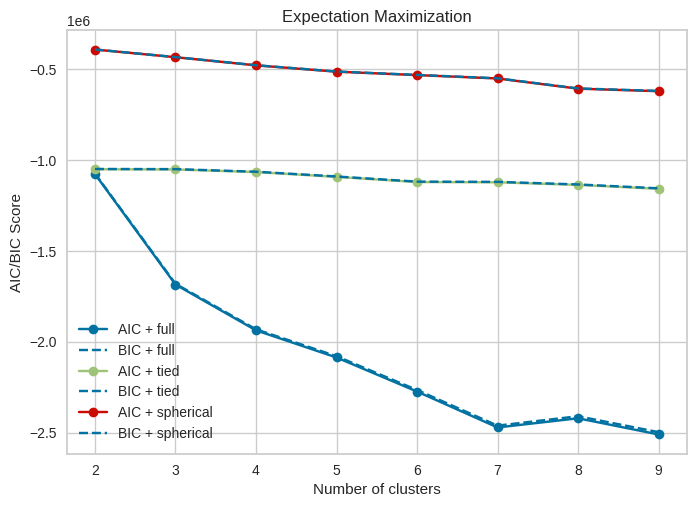

In [ ]:
plot_em("Expectation Maximization", x_train)
plt.show()

In [ ]:
em_model  = GaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
em_model.fit(x_train)

GaussianMixture(covariance_type='spherical', n_components=2, random_state=0)

In [ ]:
y_pred = em_model.predict(x_train)

#Dimentionality Reduction

## Principal Component Analysis (PCA)

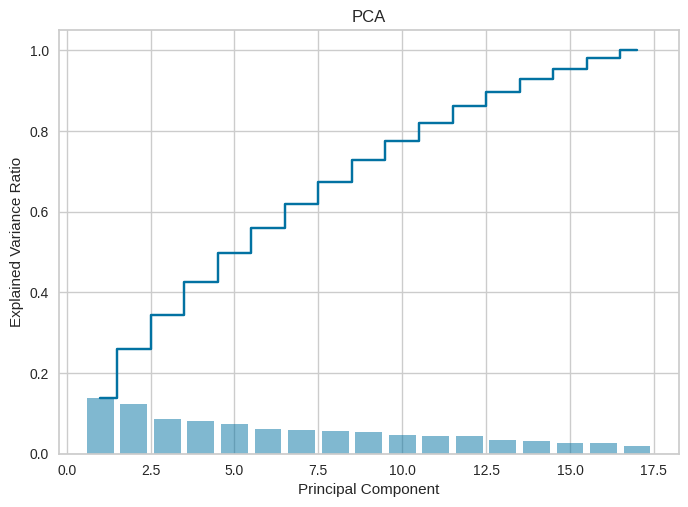

In [ ]:
plot_pca("PCA", normalized_x_train)
plt.show()

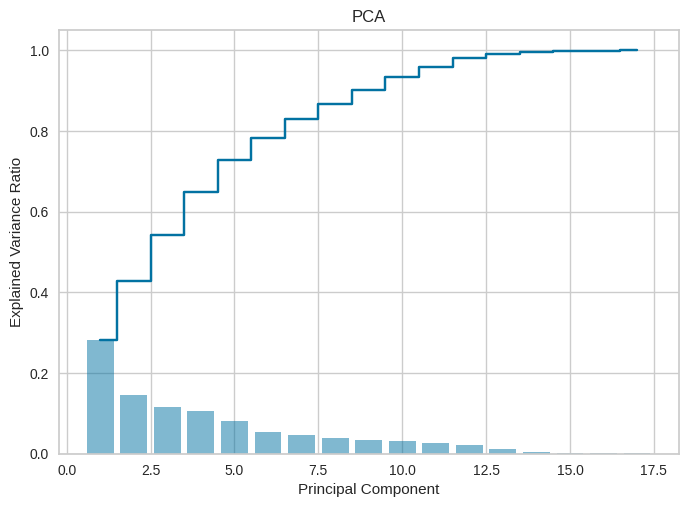

In [ ]:
plot_pca("PCA", x_train)
plt.show()

In [ ]:
pca = PCA(n_components=10, random_state=0)
pca_x_train = pca.fit_transform(normalized_x_train)

## Independent Component Analysis (ICA)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


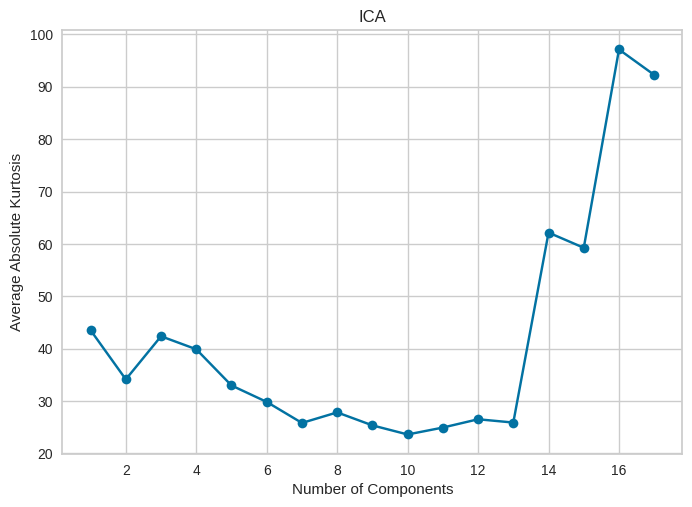

In [ ]:
plot_ica("ICA", normalized_x_train)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


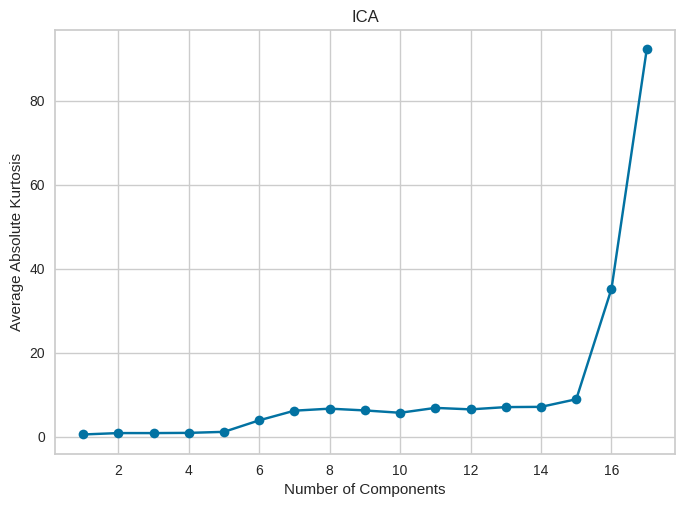

In [ ]:
plot_ica("ICA", x_train)
plt.show()

In [ ]:
ica = FastICA(n_components=2, random_state=0)
ica_x_train = pca.fit_transform(x_train)

## Random Projection (RP)

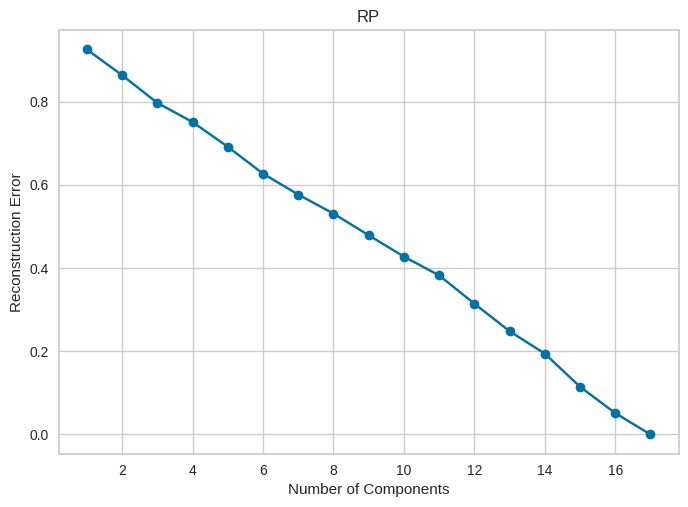

In [ ]:
plot_rp("RP", normalized_x_train)
plt.show()

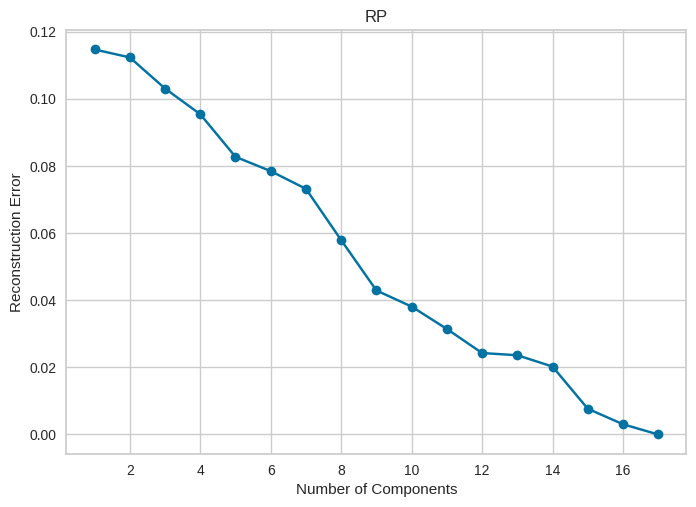

In [ ]:
plot_rp("RP", x_train)
plt.show()

In [ ]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
rp_x_train = rp.fit_transform(x_train)

## Manifold Algorithm - Locally Linear Embedding (LLE)

In [ ]:
# lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense',random_state=0)
# lle_x_train = lle.fit_transform(x_train)

# Clustering - Dimentions Reduced

##K-Means

In [ ]:
Kmeans_model = KMeans(n_clusters=2, n_init='auto', random_state=0)
Kmeans_model.fit(pca_x_train)

In [ ]:
y_pred = Kmeans_model.predict(pca_x_train)

##Expectation Maximization

In [ ]:
em_model  = GaussianMixture(n_components=2, random_state=0)
em_model.fit(pca_x_train)

In [ ]:
y_pred = em_model.predict(pca_x_train)

#Neural Network


## Base

### Loss Curve

In [ ]:
plot_loss_curve(MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01), "Reservations: Loss Curve (Neural Network)", x_train, y_train)
plt.show()

### Evaluation

In [ ]:
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01)
nn_model.fit(x_train, y_train)

In [ ]:
y_pred = nn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

## After Dimentionality Reduction

### Loss Curve

In [ ]:
plot_loss_curve(MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01), "Reservations: Loss Curve (Neural Network)", pca_x_train, y_train)
plt.show()

### Evaluation

In [ ]:
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01)
nn_model.fit(pca_x_train, y_train)

In [ ]:
y_pred = nn_model.predict(pca.transform(x_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

## With Clustering Info

### Loss Curve

In [ ]:
plot_loss_curve(MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01), "Reservations: Loss Curve (Neural Network)", x_train, y_train)
plt.show()

### Evaluation

In [ ]:
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01)
nn_model.fit(x_train, y_train)

In [ ]:
y_pred = nn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Model Comparisons